In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/5th semester/DA Project/bank-additional.csv",sep=';')
df=pd.read_csv("/content/bank-additional.csv",sep=';')
print(df.head(5))
print(df.tail(5))

   age          job  marital  ... euribor3m nr.employed   y
0   30  blue-collar  married  ...     1.313      5099.1  no
1   39     services   single  ...     4.855      5191.0  no
2   25     services  married  ...     4.962      5228.1  no
3   38     services  married  ...     4.959      5228.1  no
4   47       admin.  married  ...     4.191      5195.8  no

[5 rows x 21 columns]
      age         job  marital  ... euribor3m nr.employed   y
4114   30      admin.  married  ...     4.958      5228.1  no
4115   39      admin.  married  ...     4.959      5228.1  no
4116   27     student   single  ...     1.354      5099.1  no
4117   58      admin.  married  ...     4.966      5228.1  no
4118   34  management   single  ...     4.120      5195.8  no

[5 rows x 21 columns]


In [ ]:
df.shape

(4119, 21)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)
#Number of duplicate rows are zero, so there is no need to drop any rows in this case

number of duplicate rows: (0, 21)


In [ ]:
print(df.isnull().sum())
#No null values as well

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
df_cat=df.select_dtypes(include = 'object').copy()
df_cat.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no


In [ ]:
#We use chi square test to check correlation for categorical vairiables
#Assumption(H0): The two columns are NOT related to each other
#Result: The Probability of H0 being True
#Therefore the higher the result, lower the probabilty that Response is dependent on independent variable
for i in df_cat.columns:
  CrosstabResult=pd.crosstab(index=df[i],columns=df['y'])
  print(CrosstabResult)
  from scipy.stats import chi2_contingency
  ChiSqResult = chi2_contingency(CrosstabResult) 
  print('The chi^2 parameter is :',ChiSqResult[0])
  print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
  print()

y               no  yes
job                    
admin.         879  133
blue-collar    823   61
entrepreneur   140    8
housemaid       99   11
management     294   30
retired        128   38
self-employed  146   13
services       358   35
student         63   19
technician     611   80
unemployed      92   19
unknown         35    4
The chi^2 parameter is : 69.97867366371781
The P-Value of the ChiSq Test is: 1.2331316121045092e-10

y           no  yes
marital            
divorced   403   43
married   2257  252
single     998  155
unknown     10    1
The chi^2 parameter is : 10.285918778423026
The P-Value of the ChiSq Test is: 0.016285726690484368

y                      no  yes
education                     
basic.4y              391   38
basic.6y              211   17
basic.9y              531   43
high.school           824   97
illiterate              1    0
professional.course   470   65
university.degree    1099  165
unknown               141   26
The chi^2 parameter is : 22.29181

In [ ]:
l=[]
for i in df['y']:
  if i=='yes':
    l.append(1)
  else:
    l.append(0)
print(l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
df_cat=df.select_dtypes(include = 'int64').copy()
print(df_cat.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
df_cat=df.select_dtypes(include = 'float64').copy()
print(df_cat.columns)

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')


In [ ]:
att_list=['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']

In [ ]:
import scipy.stats as stats
for i in att_list:
  y=list(df[i])
  print(i,'=',stats.pointbiserialr(l, y))
  print()

age = PointbiserialrResult(correlation=0.060374082506977636, pvalue=0.00010569353749608584)

duration = PointbiserialrResult(correlation=0.4185653682346244, pvalue=1.9026224475615173e-174)

campaign = PointbiserialrResult(correlation=-0.07609088294850745, pvalue=1.013100714955436e-06)

pdays = PointbiserialrResult(correlation=-0.3320115339486591, pvalue=1.442855865350481e-106)

previous = PointbiserialrResult(correlation=0.25569662959028744, pvalue=1.7256908409971901e-62)

emp.var.rate = PointbiserialrResult(correlation=-0.2832156765328247, pvalue=7.82298226532281e-77)

cons.price.idx = PointbiserialrResult(correlation=-0.09832603241628073, pvalue=2.5500558703268046e-10)

cons.conf.idx = PointbiserialrResult(correlation=0.05439301829399087, pvalue=0.0004786306153970405)

euribor3m = PointbiserialrResult(correlation=-0.2985649713595469, pvalue=1.4082264365883332e-85)

nr.employed = PointbiserialrResult(correlation=-0.3492412340486664, pvalue=1.842127329497173e-118)



In [ ]:
df_cat=df.select_dtypes(include = 'object').copy()
print(df_cat)

              job  marital          education  ... day_of_week     poutcome   y
0     blue-collar  married           basic.9y  ...         fri  nonexistent  no
1        services   single        high.school  ...         fri  nonexistent  no
2        services  married        high.school  ...         wed  nonexistent  no
3        services  married           basic.9y  ...         fri  nonexistent  no
4          admin.  married  university.degree  ...         mon  nonexistent  no
...           ...      ...                ...  ...         ...          ...  ..
4114       admin.  married           basic.6y  ...         thu  nonexistent  no
4115       admin.  married        high.school  ...         fri  nonexistent  no
4116      student   single        high.school  ...         mon      failure  no
4117       admin.  married        high.school  ...         fri  nonexistent  no
4118   management   single        high.school  ...         wed  nonexistent  no

[4119 rows x 11 columns]


In [ ]:
for i in df_cat.columns:
  print(i,set(df[i]))

job {'housemaid', 'entrepreneur', 'technician', 'management', 'student', 'self-employed', 'admin.', 'blue-collar', 'retired', 'unknown', 'services', 'unemployed'}
marital {'single', 'unknown', 'divorced', 'married'}
education {'professional.course', 'illiterate', 'high.school', 'basic.6y', 'university.degree', 'basic.4y', 'unknown', 'basic.9y'}
default {'unknown', 'yes', 'no'}
housing {'unknown', 'yes', 'no'}
loan {'unknown', 'yes', 'no'}
contact {'telephone', 'cellular'}
month {'may', 'jul', 'oct', 'dec', 'mar', 'jun', 'sep', 'nov', 'aug', 'apr'}
day_of_week {'fri', 'tue', 'wed', 'thu', 'mon'}
poutcome {'failure', 'success', 'nonexistent'}
y {'yes', 'no'}


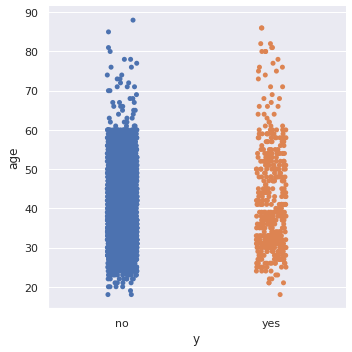

In [ ]:
sns.catplot(x="y", y="age", data=df);
#sns.catplot(x="age", y="y", data=df);

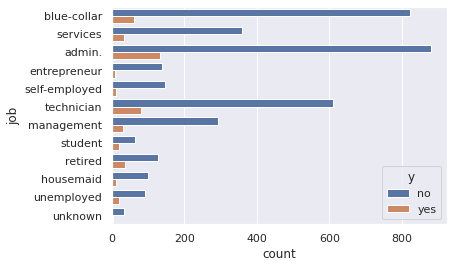

In [ ]:
sns.countplot(y='job',hue ='y', data = df)

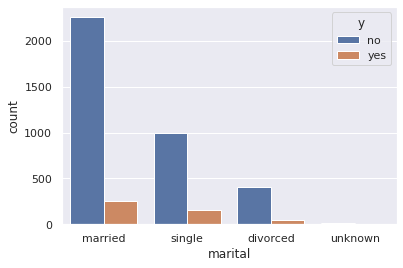

In [ ]:
sns.countplot(x ='marital',hue ='y', data = df)

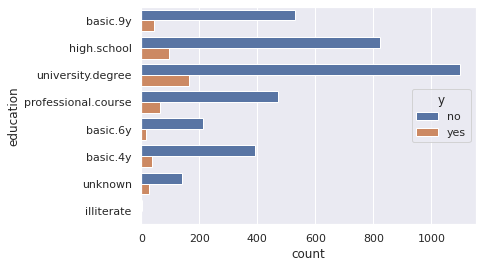

In [ ]:
sns.countplot(y ='education',hue ='y',orient='v', data = df)

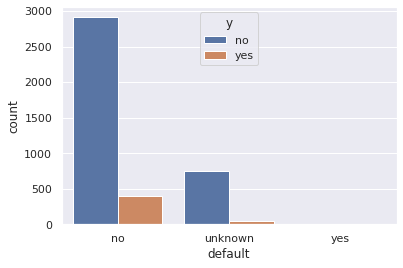

In [ ]:
sns.countplot(x ='default',hue ='y', data = df)

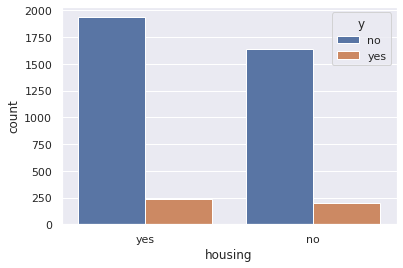

In [ ]:
sns.countplot(x ='housing',hue ='y', data = df[df.housing != 'unknown'])

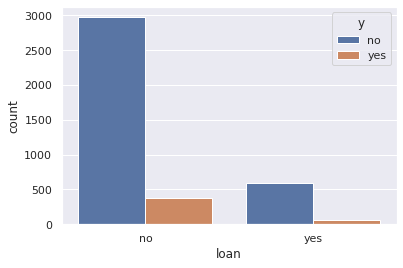

In [ ]:
sns.countplot(x ='loan',hue ='y', data = df[df.loan != 'unknown'])

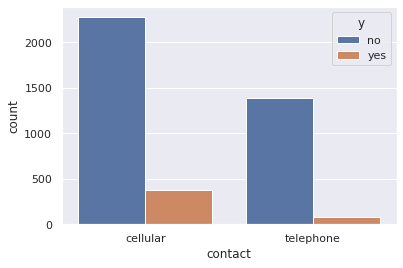

In [ ]:
sns.countplot(x ='contact',hue ='y', data = df)

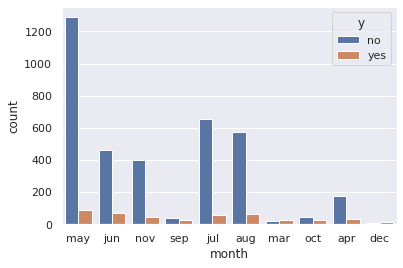

In [ ]:
sns.countplot(x ='month',hue ='y', data = df)

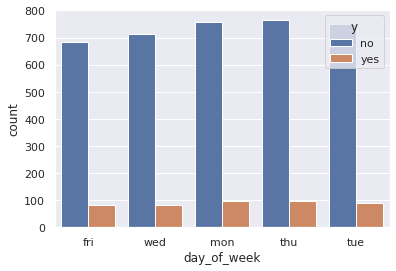

In [ ]:
sns.countplot(x ='day_of_week',hue ='y', data = df)